In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Step 1: Read in the CSV files using pandas
data_2021 = pd.read_csv('2021_stock.csv')
data_2022 = pd.read_csv('2022_stock.csv')

In [3]:
# Convert 'Date' columns to datetime type
data_2021['Date'] = pd.to_datetime(data_2021['Date'], format='%m/%d/%Y')
data_2022['Date'] = pd.to_datetime(data_2022['Date'], format='%m/%d/%Y')

In [4]:
# Merge the datasets on 'Date'
merged_data = pd.merge(data_2021, data_2022, on='Date', how='outer', suffixes=('_2021', '_2022'))

In [5]:
# Set 'Date' as the index and sort by it
merged_data.set_index('Date', inplace=True)
merged_data.sort_index(inplace=True)

In [6]:
# Resample the data to weekly frequency, aggregating 'Close' values by taking the mean for each week
weekly_data = merged_data[['Close_2021', 'Close_2022']].resample('W').mean()

In [7]:
# Drop rows with all NaN values (in case there are weeks with no data)
weekly_data.dropna(how='all', inplace=True)

In [8]:
# Drop columns with all NaN values (in case one year has no data for some weeks)
weekly_data.dropna(axis=1, how='all', inplace=True)

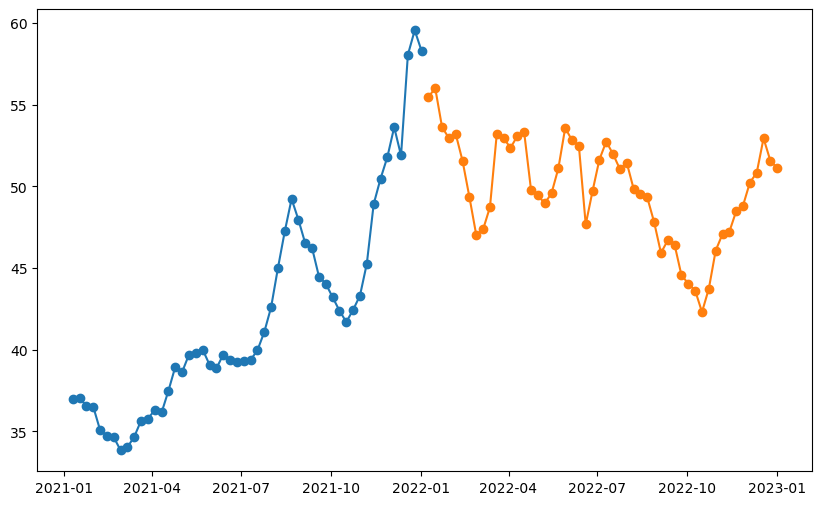

In [9]:
# Plotting the weekly average 'Close' prices
plt.figure(figsize=(10, 6))
plot_exists = False
if 'Close_2021' in weekly_data.columns:
    plt.plot(weekly_data.index, weekly_data['Close_2021'], label='2021 Weekly Close', linestyle='-', marker='o')
    plot_exists = True
if 'Close_2022' in weekly_data.columns:
    plt.plot(weekly_data.index, weekly_data['Close_2022'], label='2022 Weekly Close', linestyle='-', marker='o')
    plot_exists = True

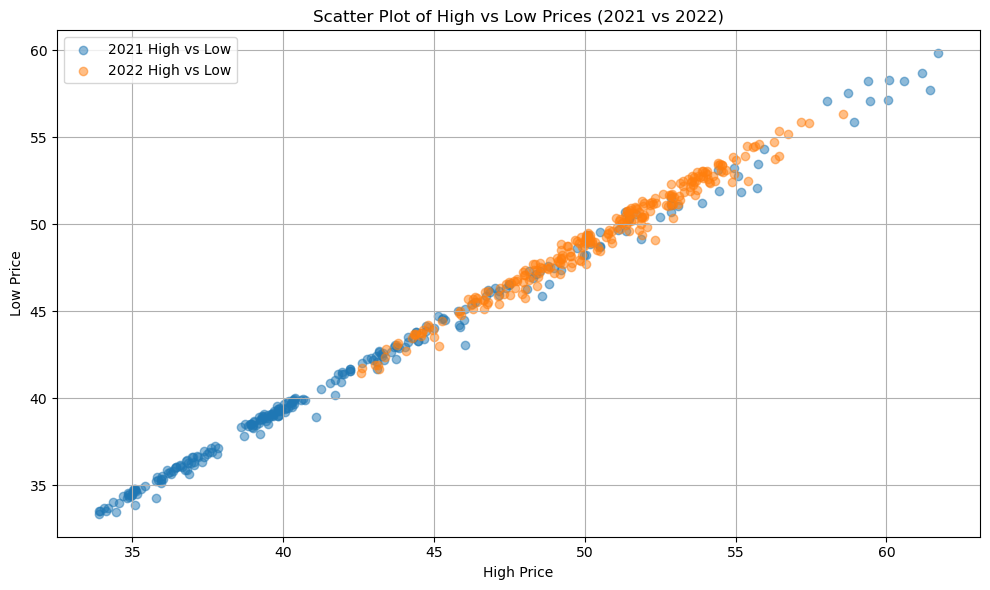

In [10]:
# Visualization 8: Scatter Plot of High vs. Low (2021 and 2022)
plt.figure(figsize=(10, 6))
if 'High_2021' in merged_data.columns and 'Low_2021' in merged_data.columns:
    plt.scatter(merged_data['High_2021'], merged_data['Low_2021'], alpha=0.5, label='2021 High vs Low')
if 'High_2022' in merged_data.columns and 'Low_2022' in merged_data.columns:
    plt.scatter(merged_data['High_2022'], merged_data['Low_2022'], alpha=0.5, label='2022 High vs Low')

plt.title('Scatter Plot of High vs Low Prices (2021 vs 2022)')
plt.xlabel('High Price')
plt.ylabel('Low Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()